#**Predictive Analytics**

Nama: Joko prabowo <br>
ID: jprabowo <br>
Email: jokoprabowo4550@gmail.com <br>

##**Data loading**
---
Proses dalam menyimpan dan memuat data untuk diproses lebih lanjut

In [30]:
import pandas as pd

url = 'https://github.com/jokoprabowo/predictive_analytics_for_water_quallity_prediction/releases/download/dataset/diabetes.csv'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##**Exploratory data analysis**
---
 Proses untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

###Deskripsi variabel
---
Proses untuk mendeskripsikan setiap variabel agar variabel tersebut dapat dimengerti secara umum


Berdasarkan informasi dari kaggle, variable-variable diatas dapat diartikan:

Variabel|Keterangan
---|---
Pregnancies|Jumlah kehamilan
Glucose|Kadar glukosa dalam darah
BloodPressure|Tekanan darah
SkinThickness|Ketebalan kulit
Insulin|Kadar insulin dalam tubuh
BMI|Index massa tubuh
DiabetesPedigreeFunction|Presentase diabetes
Age|Umur
Outcome|Nilai akhir (positif = 1) dan (negatif = 0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dari hasil diatas dapat dilihat bahwa:
*   Terdapat 6 data numerik dengan tipe data int64, yaitu: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, dan Age
*   Terdapat 2 data numerik dengan tipe data float64, yaitu: BMI, dan DiabetesPedigreeFunction
*   Terdapat 1 data kategorik dengan tipe data int64, yaitu: Outcome yang merupakan target fitur dari proyek ini.



In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data diatas memperlihatkan informasi statistik pada setiap kolom yaitu:

Variabel|Keterangan
---|---
count|jumlah sampel
mean|nilai rata-rata
std|standar deviasi
min|nilai minimum
25%|kuartil pertama
50%|kuartil kedua
75%|kuartil ketiga
max|nilai maximum


###Menangani missing value dan outliners
---
Proses untuk menghapus kolom yang bernilai kosong (NaN) serta terduplikat, untuk mengatasi data ganda dan data yang tidak lengkap

In [33]:
# menampilkan total data kosong
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Berdasarkan hasil diatas, tidak ada data kosong dalam dataset ini

Kemudian lakukan cek terhadap data terduplikasi

In [34]:
df.duplicated().sum()

0

Keterangan diatas menyatakan bahwa tidak ada data yang terduplikasi

In [35]:
df_features = df.columns.tolist()
df_features.remove('Outcome')

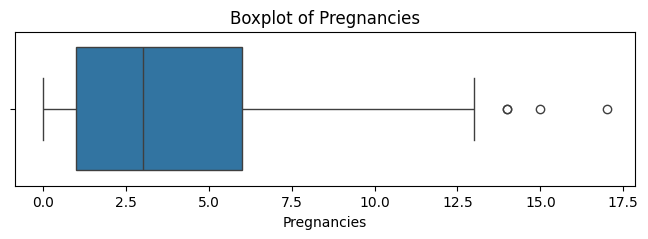

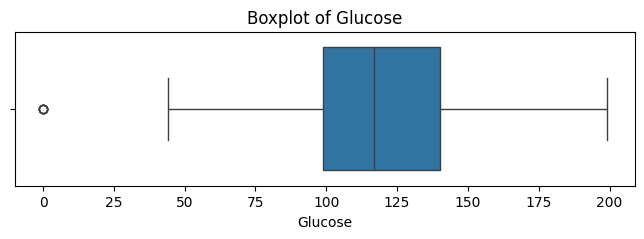

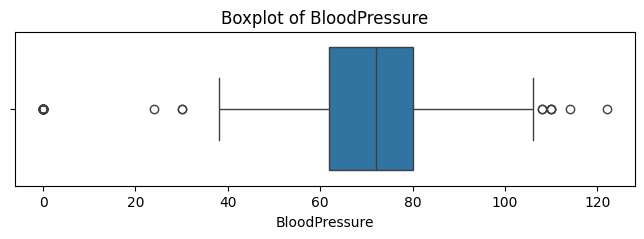

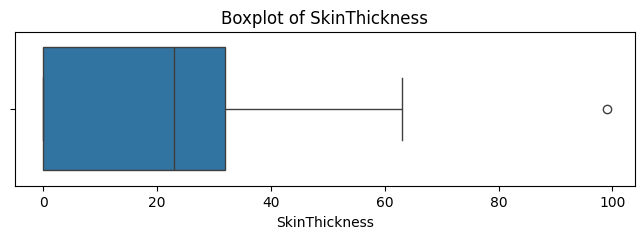

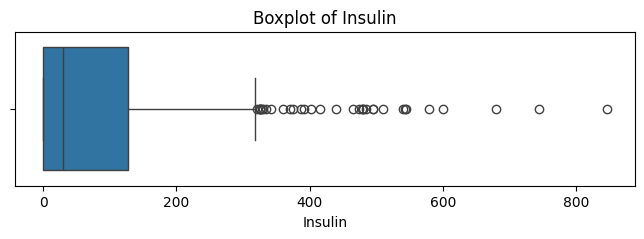

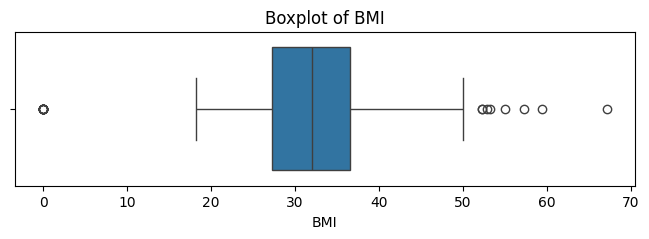

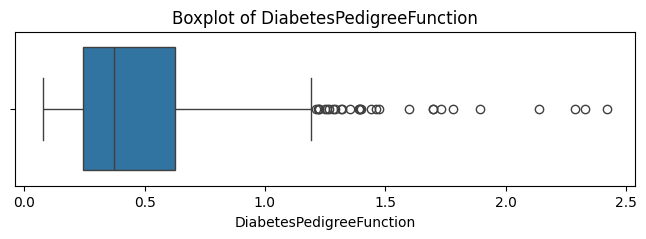

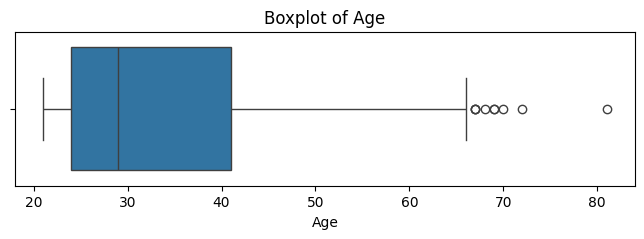

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df_features:
  plt.figure(figsize=(8,2))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

Gambar diatas merupakan visualisasi data untuk mendeteksi outliners pada setiap fitur numerik, kemudian outliners tersebut akan diatasi menggunakan metode IQR

In [37]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape, df_out.shape

((768, 9), (639, 9))

Hasil diatas merupakan total data sebelum dan sesudah menangani data outliner

###Unvariate analysis
---
Proses untuk menganalisis data terhadap satu variabel secara mandiri

In [38]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    int64  
 1   Glucose                   639 non-null    int64  
 2   BloodPressure             639 non-null    int64  
 3   SkinThickness             639 non-null    int64  
 4   Insulin                   639 non-null    int64  
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    int64  
 8   Outcome                   639 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.9 KB


Bagi fitur menjadi numerical dan categorical features berdasarkan data diatas, dan lakukan proses analisis pada setiap fiturnya

In [39]:
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_features = ['Outcome']

         jumlah sampel  persentase
Outcome                           
0                  439        68.7
1                  200        31.3


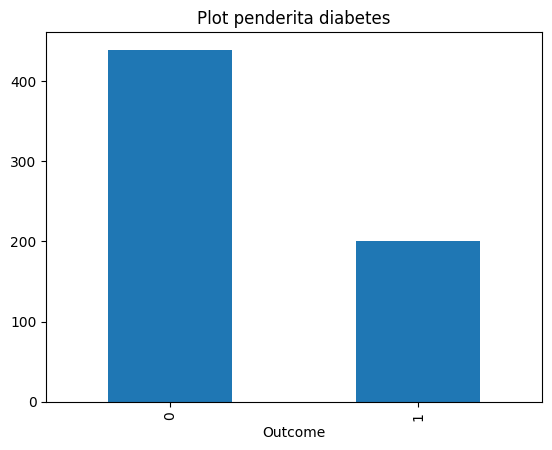

In [40]:
# Fitur outcome
feature = categorical_features[0]
count = df_out[feature].value_counts()
percent = 100*df_out[feature].value_counts(normalize=True)
df_outcome = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_outcome)
count.plot(kind='bar', title='Plot penderita diabetes');

Berdasarkan gambar diatas, dapat disimpulkan bahwa mayoritas responden bukan merupakan penderita diabetes (Outcome = 0)

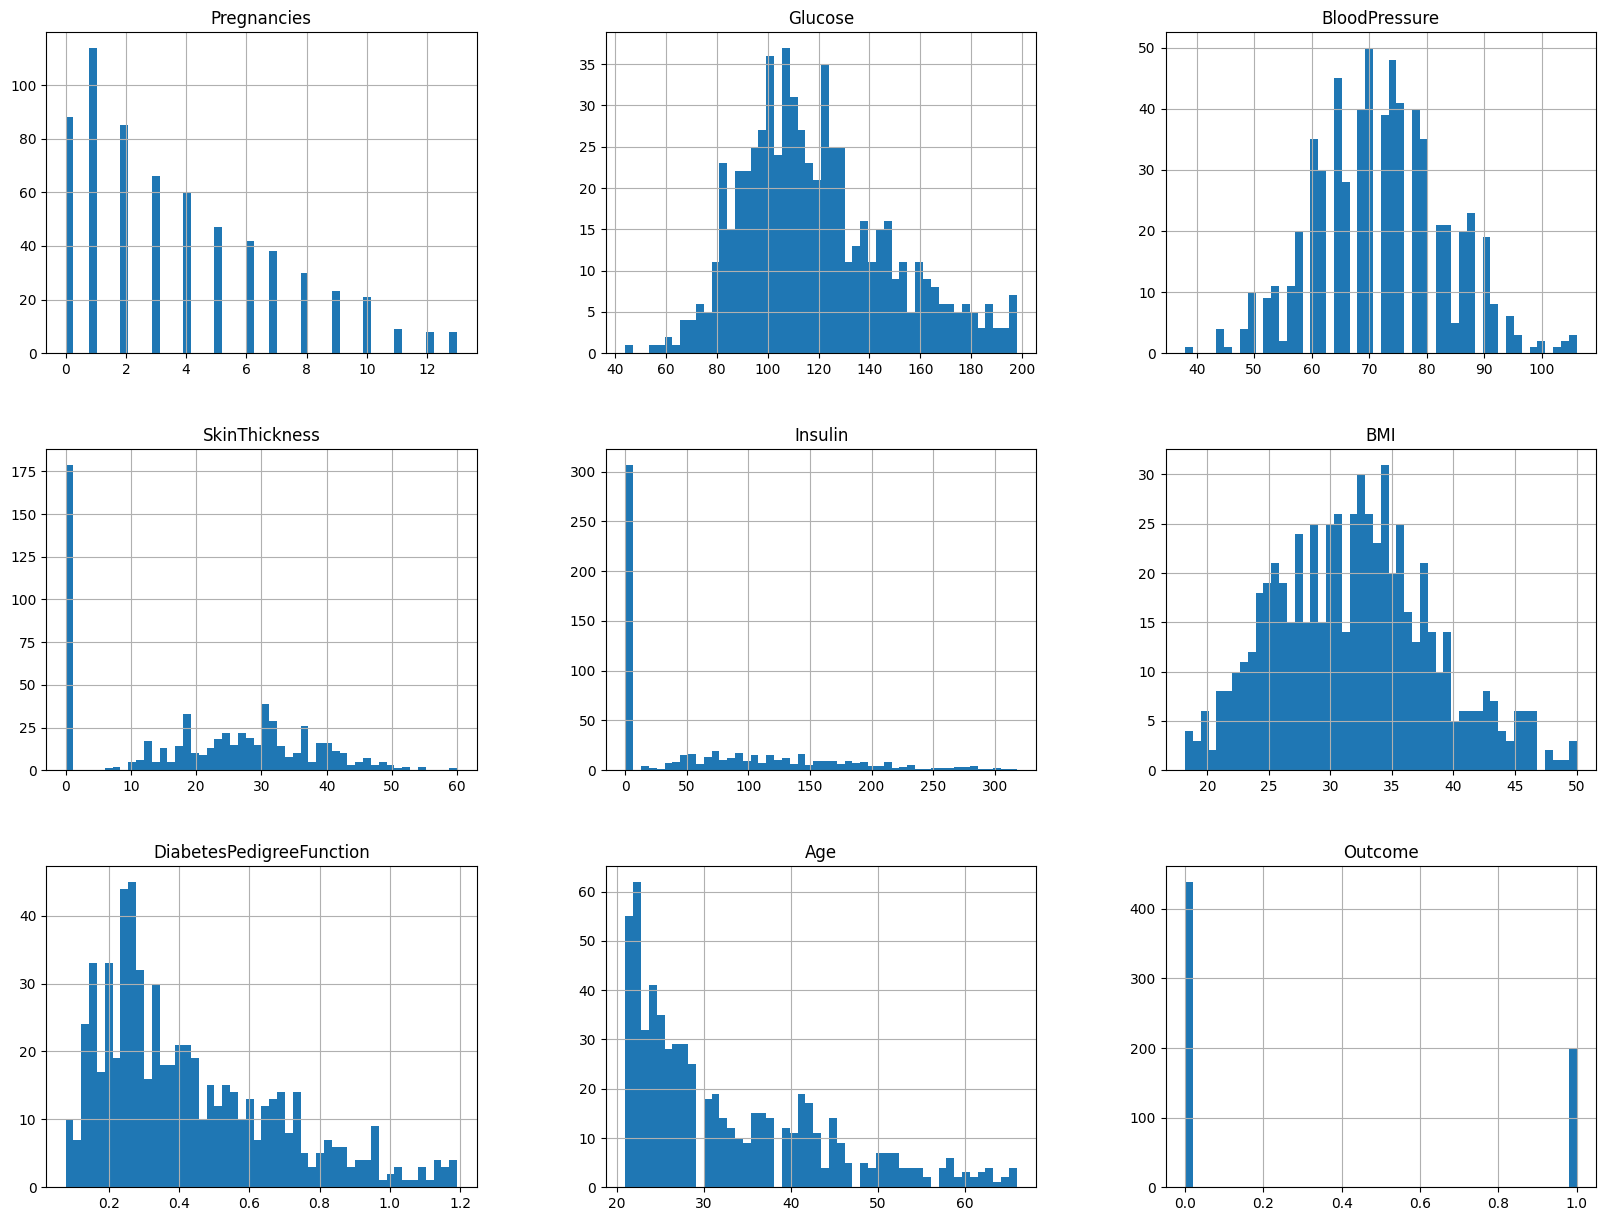

In [41]:
df_out.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan histogram diatas dapat disimpulkan bahwa:
*   Plot histogram SkinThickness dan Insulin tidak berdistribusi normal
*   Plot histogram dari Glucose, BloodPressure, dan BMI cukup berdistribusi normal
*   Plot histogram dari Pregnancies, DiabetesPedigreeFunction, dan Age berdistribusi cenderung miring ke kanan sehingga mayoritas data memiliki nilai dibawah rata-rata


###Multivariate analysis
---
Proses yang digunakan untuk menganalisis hubungan antara dua variabel atau lebih

Untuk menganalisis hubungan antara fitur target (Outcome) dengan fitur lainnya pada proyek ini, fungsi stripplot() akan digunakan sebagai visualisasi hubungannya

In [42]:
df_features = df_out.columns.tolist()
df_features.remove('Outcome')

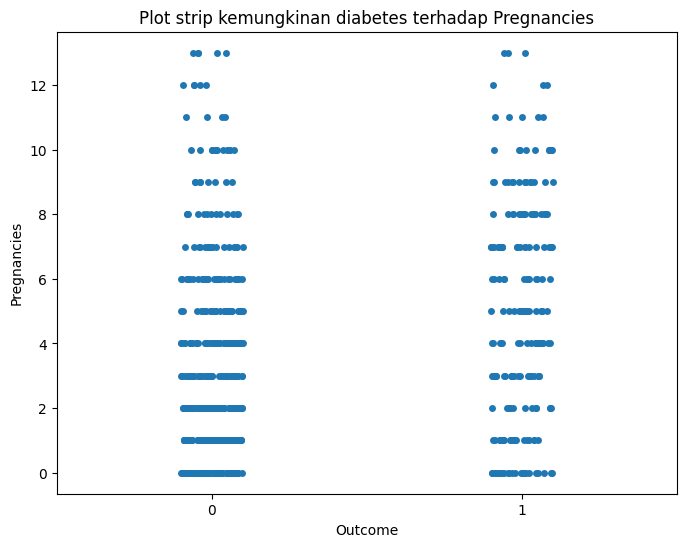

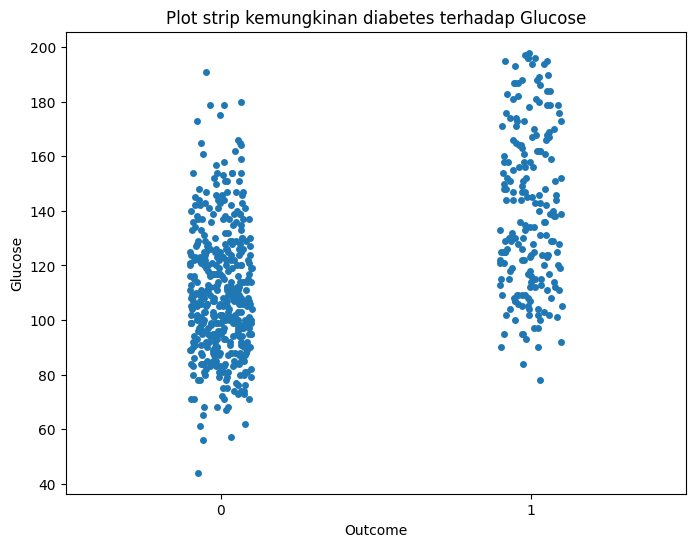

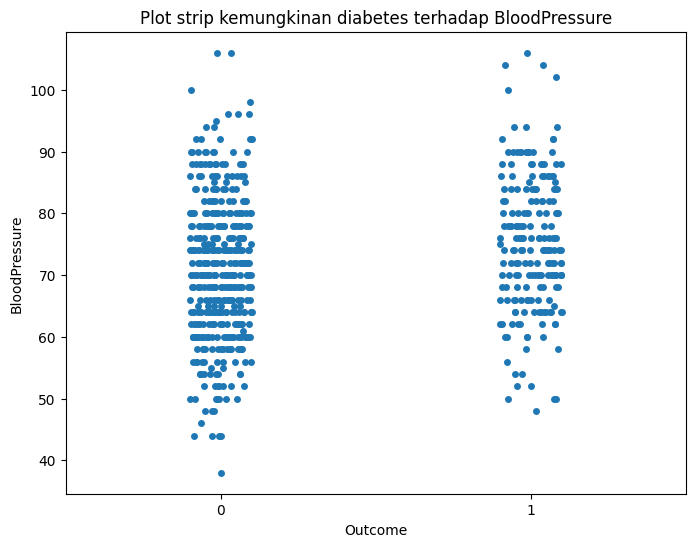

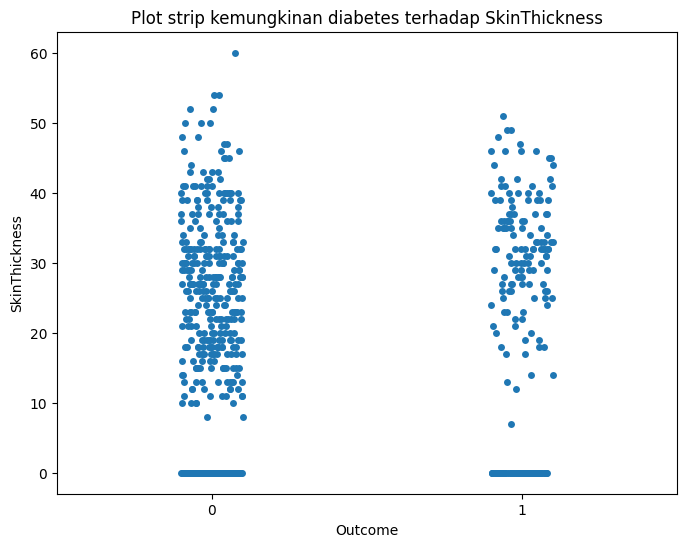

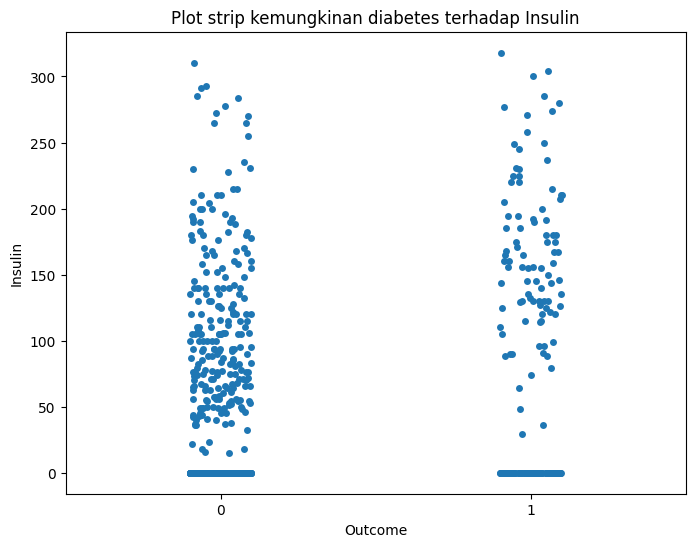

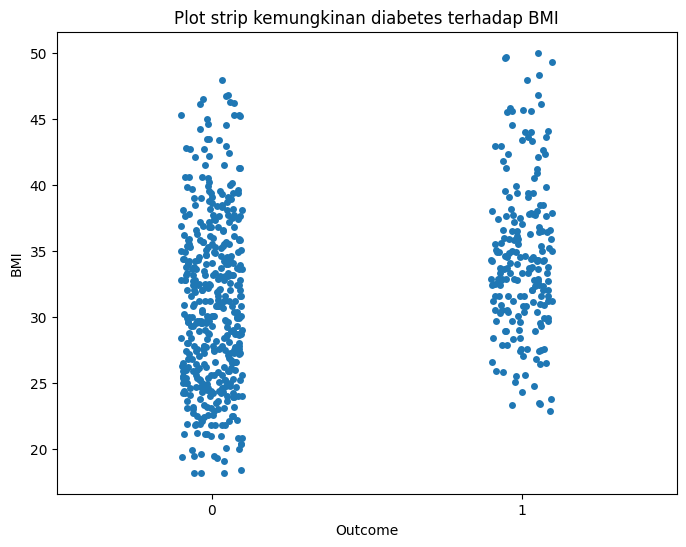

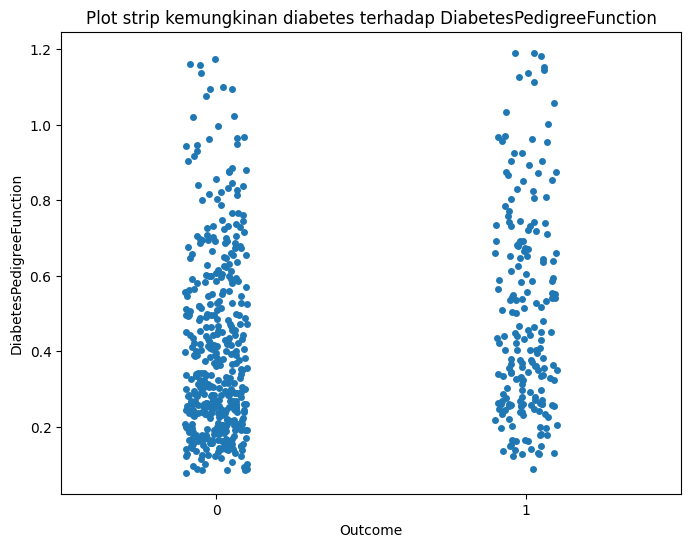

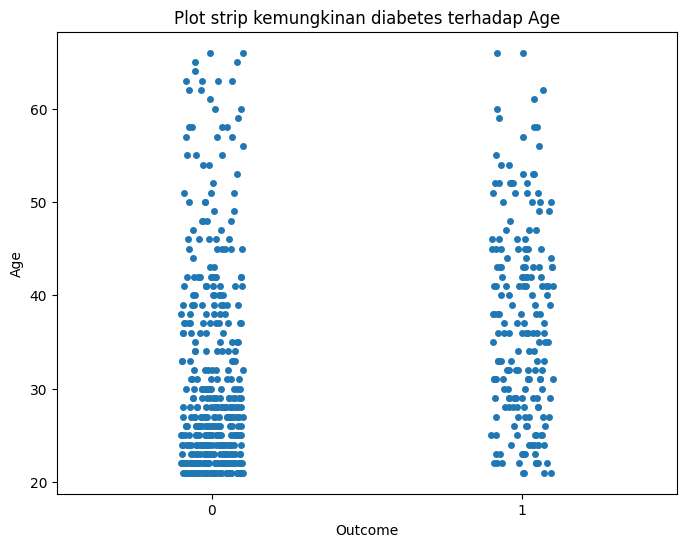

In [43]:
# Membuat plot strip perbandingan untuk setiap fitur
for column in df_features:
  plt.figure(figsize = (8, 6))
  sns.stripplot(data = df_out, x = "Outcome", y = column)
  plt.title(f'Plot strip kemungkinan diabetes terhadap {column}')
  plt.xlabel('Outcome')
  plt.ylabel(f'{column}')
  plt.show()

Berdasarkan visualisasi dari gambar-gambar diatas dapat disimpulkan bahwa:
*   Tidak terdapat perbedaan yang mencolok antara fitur-fitur diatas dengan kemungkinan menderita diabetes
*   Namun, dalam rentang kandungan glukosa di dalam tubuh orang pengidap diabetes berkisar 80 - 200 mg/dL namun berkisar 40 - 180 mg/dL untuk yang bukan pengidap diabetes





Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

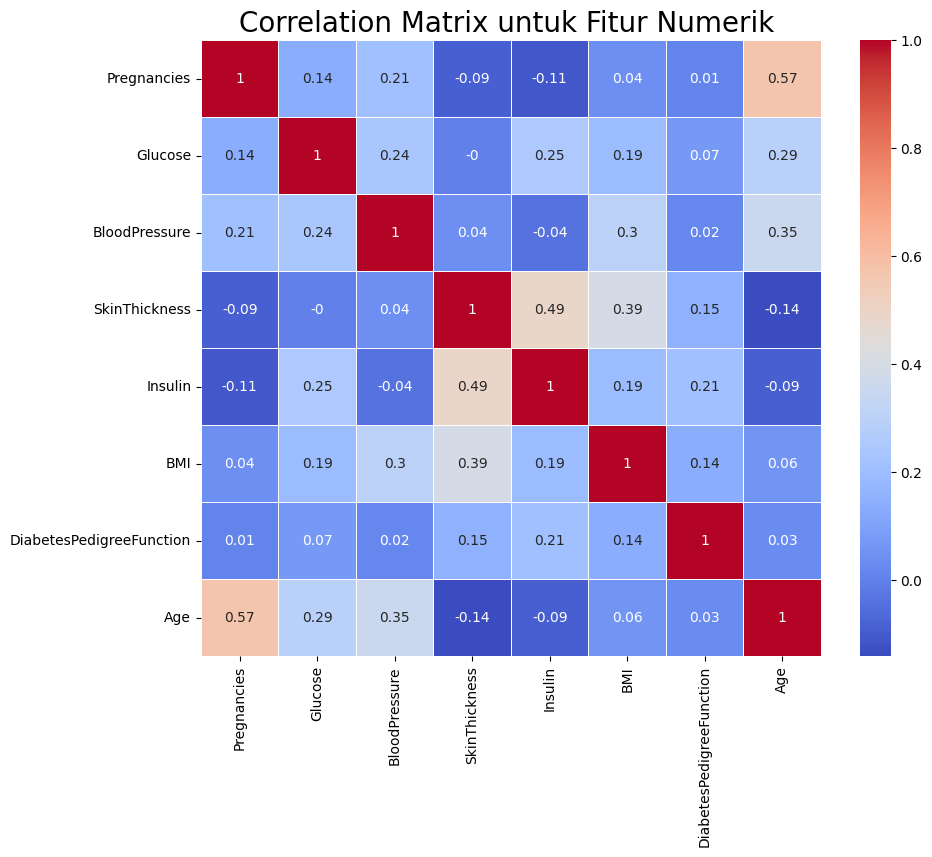

In [44]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_out[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dari heatmap diatas dapat terlihat bahwa:
*   Umur punya korelasi yang cukup tinggi terhadap jumlah kehamilan, layaknya kadar insulin dalam tubuh terhadap ketebalan kulit
*   Namun Umur punya korelasi yang sangat rendah terhadap kadar insulin dalam tubuh, layaknya jumlah kehamilan terhadap ketebalan kulit



##**Data preparation**
---
Proses untuk menyiapkan data mentah agar dapat diproses dan dianalisis lebih lanjut.

###Train-Test-Split
---
Proses ini dilakukan untuk membagi data menjadi data latih(train), dan data uji(test) yang digunakan untuk membuat model

Sebelum membuat data training dan test, data perlu dipisahkan antara fitur komposisi dan fitur target

In [45]:
from sklearn.model_selection import train_test_split

X = df_out[df_features]
y = df_out['Outcome']

# Komposisi data train dan data test adalah 80% dan 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (511, 8)
Ukuran X_test:  (128, 8)
Ukuran y_train:  (511,)
Ukuran y_test:  (128,)


###Standarisasi
---
Proses ini digunakan untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma

Proses ini akan menggunakan fungsi standardScaler yang akan mengurangi nilai rata-rata dan kemudian membaginya dengan standar deviasi. Fungsi ini akan menghasilkan nilai rata-rata 0 dan standar deviasi 1

In [47]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
722,-0.879418,1.004207,-0.393266,0.539350,0.733503,-0.428419,-0.323523,0.804214
213,-1.185954,0.694708,-0.656646,0.344528,0.770607,1.616003,0.003544,-0.803165
343,0.346728,0.075709,1.187015,-1.343926,-0.837214,0.401647,-0.558851,0.000524
306,1.879411,1.416873,-0.393266,0.149706,0.795343,-1.012540,-0.415261,1.250708
304,-0.266345,1.038596,0.309081,-1.343926,-0.837214,-1.704262,-0.889906,0.357720


In [48]:
X_train[numerical_features].describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,511.000,511.000,511.000,511.000,511.000,511.000,511.000,511.000
mean,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.186,-2.607,-3.027,-1.344,-0.837,-2.135,-1.404,-1.071
25%,-0.879,-0.715,-0.744,-1.344,-0.837,-0.736,-0.766,-0.803
50%,-0.266,-0.165,-0.042,0.150,-0.343,-0.013,-0.272,-0.357
75%,0.653,0.626,0.660,0.734,0.709,0.632,0.626,0.626
max,2.799,2.689,2.943,2.163,3.096,2.754,3.027,2.947


Seperti yang terlihat pada data diatas, setelah melewati proses standarisasi nilai mean menyentuh 0 dan standar deviasi 1, sehingga proses selanjutnya akan menjadi lebih mudah

##**Model development**
---
Proses sistematis dalam membuat model untuk menyelesaikan masalah.

Dalam proyek ini, model yang akan digunakan yaitu:
*   K-Nearest Neighbour
*   Random Forrest
*   Adaptive Boosting
*   Support Vector Machine
*   Decision Tree Regression

Proses pertama adalah dengan menyiapkan dataframe untuk menyimpan model-model diatas



In [49]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting', 'SVM', 'DecisionTree'])

Dilanjutkan dengan mengimplementasikan model:

Model K-Nearest Neighbour(KNN)

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=50, p=1, leaf_size=10)
knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Model Random Forrest

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=rf.predict(X_train), y_true=y_train)

Model Adaptive Boosting

In [52]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(n_estimators=50,learning_rate=0.01, random_state=42)
boosting.fit(X_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Model Support Vector Machine

In [53]:
from sklearn.svm import SVR

svm = SVR(gamma = 'auto', verbose=True)
svm.fit(X_train, y_train)

models.loc['train_mse','SVM'] = mean_squared_error(y_pred=svm.predict(X_train), y_true=y_train)

[LibSVM]

Model Decission Tree Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(min_samples_leaf = 1, min_samples_split = 2, max_depth = 1, max_features = 4, random_state = 42)
dtree.fit(X_train, y_train)

models.loc['train_mse', 'DecisionTree'] = mean_squared_error(y_true=y_train, y_pred=dtree.predict(X_train))


##**Evaluasi model**
---
Proses untuk mengevaluasi hasil prediksi dari model yang telah dibuat.

Metrik yang digunakan dalam proses evaluasi ini adalah *Mean Squared Error* (MSE). Metrik ini akan dikalikan dengan selisih kuadrat rata-rata nilai sebenarnya dengan hasil prediksi dari model. Namun sebelum melakukan evaluasi, perlu dilakukan scaling pada fitur numerik dalam data uji seperti halnya yang telah dilakukan pada data latih sebelumnya. Hal ini dilakukan agar skala nilai antar keduanya serupa.

In [55]:
# Melakukan scaling pada fitur numerik dalam data uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-55-6687f1d22932>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.26634486 -0.26634486  1.26633784 -0.26634486 -0.87941794  0.65326476
 -0.26634486 -0.5728814  -0.87941794  0.04019168  0.9598013   0.34672822
 -0.87941794  0.04019168  2.79902055 -0.26634486 -0.5728814  -0.87941794
  1.26633784  0.04019168 -1.18595449  0.04019168 -0.5728814  -0.87941794
  1.57287439 -0.87941794 -1.18595449 -1.18595449  0.65326476 -1.18595449
 -0.26634486 -0.5728814  -0.5728814   0.04019168 -0.26634486 -0.26634486
  1.26633784  1.57287439 -0.5728814  -0.87941794 -0.26634486  0.34672822
  0.04019168 -0.5728814  -0.5728814  -0.87941794 -1.18595449  0.9598013
  0.9598013  -0.5728814   1.87941093  1.57287439 -0.87941794 -1.18595449
 -0.87941794  2.49248401 -0.87941794  0.04019168 -0.5728814  -0.26634486
  0.65326476 -1.18595449  0.9598013  -0.87941794  0.9598013  -0.5728814
  0.9598013  -0.87941794 -1.18595449 -1.185954

In [56]:
# Melakukan evaluasi pada setiap model yang telah dibuat
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RandomForest', 'Boosting', 'SVM', 'DecisionTree'])

model_dict = {'KNN': knn, 'RandomForest': rf, 'Boosting': boosting, 'SVM': svm, 'DecisionTree': dtree}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.000159,0.000141
RandomForest,0.000034,0.000127
Boosting,0.000132,0.000141
SVM,0.000102,0.000147
DecisionTree,0.0002,0.000164


Visualisasikan metrik ke dalam bar chart

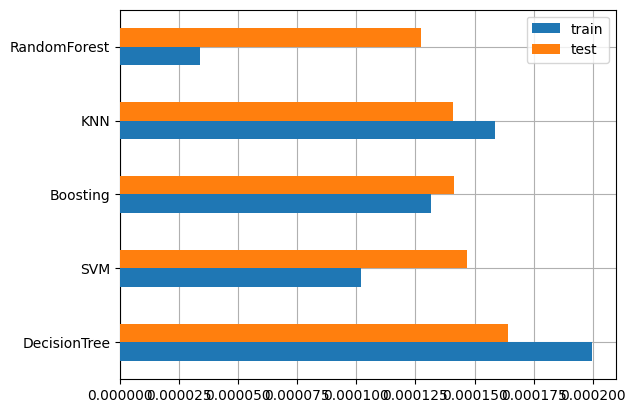

In [57]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Lakukan pengujian pada setiap model

In [58]:
prediksi = X_test.iloc[:3].copy()
pred_dict = {'y_true':y_test[:3]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RandomForest,prediksi_Boosting,prediksi_SVM,prediksi_DecisionTree
108,0,0.1,0.0,0.1,-0.0,0.2
431,0,0.1,0.0,0.1,-0.0,0.5
690,0,0.3,0.2,0.2,0.2,0.5


Berdasarkan dari data diatas yang memperlihatkan berbagai macam nilai hasil prediksi dari setiap model, setiap model menghasilkan nilai prediksi yang bervariatif namun selisihnya tidak terlalu jauh. Nilai prediksi yang selisihnya lumayan jauh dari setiap model dan nilai aktual dihasilkan oleh model Decission Tree Regressor. Sedangkan hasil prediksi yang nilainya mendekati nilai aktual diperoleh oleh model Random Forest.


